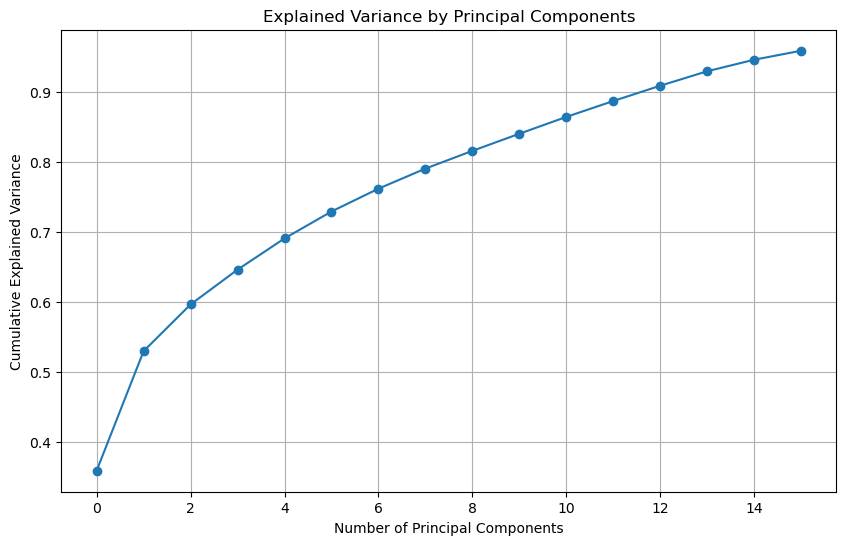

Original shape: (30000, 23)
Reduced shape: (30000, 16)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
df = pd.read_excel(r'C:\Users\Laptops\Datamites\ModelMates_2024\default of credit card clients.xls', engine='xlrd')
# Drop first column
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df.drop(columns = ['ID'], inplace = True)
# For column Limit_bal
df['LIMIT_BAL'] = pd.to_numeric(df['LIMIT_BAL'], errors='coerce')
df['LIMIT_BAL_sqrt'] = np.sqrt(df['LIMIT_BAL'])
Q1 = df['LIMIT_BAL_sqrt'].quantile(0.25)
Q3 = df['LIMIT_BAL_sqrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['LIMIT_BAL_sqrt'] = df['LIMIT_BAL_sqrt'].clip(lower=lower_bound, upper=upper_bound)
# For column Bill_Amt1
df['BILL_AMT1'] = pd.to_numeric(df['BILL_AMT1'], errors='coerce')
df['BILL_AMT1_cbrt'] = np.cbrt(df['BILL_AMT1'])
Q1 = df['BILL_AMT1_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT1_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT1_cbrt'] = df['BILL_AMT1_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT1_cbrt_binned'] = pd.qcut(df['BILL_AMT1_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT1_cbrt_binned'] = df['BILL_AMT1_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt2
df['BILL_AMT2'] = pd.to_numeric(df['BILL_AMT2'], errors='coerce')
df['BILL_AMT2_cbrt'] = np.cbrt(df['BILL_AMT2'])
Q1 = df['BILL_AMT2_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT2_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT2_cbrt'] = df['BILL_AMT2_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT2_cbrt_binned'] = pd.qcut(df['BILL_AMT2_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT2_cbrt_binned'] = df['BILL_AMT2_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)

# For column Bill_Amt3
df['BILL_AMT3'] = pd.to_numeric(df['BILL_AMT3'], errors='coerce')
df['BILL_AMT3_cbrt'] = np.cbrt(df['BILL_AMT3'])
Q1 = df['BILL_AMT3_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT3_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT3_cbrt'] = df['BILL_AMT3_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT3_cbrt_binned'] = pd.qcut(df['BILL_AMT3_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT3_cbrt_binned'] = df['BILL_AMT3_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt4
df['BILL_AMT4'] = pd.to_numeric(df['BILL_AMT4'], errors='coerce')
df['BILL_AMT4_cbrt'] = np.cbrt(df['BILL_AMT4'])
Q1 = df['BILL_AMT4_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT4_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT4_cbrt'] = df['BILL_AMT4_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT4_cbrt_binned'] = pd.qcut(df['BILL_AMT4_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT4_cbrt_binned'] = df['BILL_AMT4_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt5
df['BILL_AMT5'] = pd.to_numeric(df['BILL_AMT5'], errors='coerce')
df['BILL_AMT5_cbrt'] = np.cbrt(df['BILL_AMT5'])
Q1 = df['BILL_AMT5_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT5_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT5_cbrt'] = df['BILL_AMT5_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT5_cbrt_binned'] = pd.qcut(df['BILL_AMT5_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT5_cbrt_binned'] = df['BILL_AMT5_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt6
df['BILL_AMT6'] = pd.to_numeric(df['BILL_AMT6'], errors='coerce')
df['BILL_AMT6_cbrt'] = np.cbrt(df['BILL_AMT6'])
Q1 = df['BILL_AMT6_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT6_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT6_cbrt'] = df['BILL_AMT6_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT6_cbrt_binned'] = pd.qcut(df['BILL_AMT6_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT6_cbrt_binned'] = df['BILL_AMT6_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt1
df['PAY_AMT1']=pd.to_numeric(df['PAY_AMT1'],errors='coerce')
df['PAY_AMT1_cbrt'] = np.cbrt(df['PAY_AMT1'])
Q1 = df['PAY_AMT1_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT1_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT1_cbrt'] = df['PAY_AMT1_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT1_cbrt_binned'] = pd.qcut(df['PAY_AMT1_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT1_cbrt_binned'] = df['PAY_AMT1_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt2
df['PAY_AMT2']=pd.to_numeric(df['PAY_AMT2'],errors='coerce')
df['PAY_AMT2_cbrt']=np.cbrt(df['PAY_AMT2'])
Q1 = df['PAY_AMT2_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT2_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT2_cbrt'] = df['PAY_AMT2_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT2_cbrt_binned'] = pd.qcut(df['PAY_AMT2_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT2_cbrt_binned'] = df['PAY_AMT2_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt3
df['PAY_AMT3']=pd.to_numeric(df['PAY_AMT3'],errors='coerce')
df['PAY_AMT3_cbrt']=np.cbrt(df['PAY_AMT3'])
Q1 = df['PAY_AMT3_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT3_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT3_cbrt'] = df['PAY_AMT3_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT3_cbrt_binned'] = pd.qcut(df['PAY_AMT3_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT3_cbrt_binned'] = df['PAY_AMT3_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt4
df['PAY_AMT4']=pd.to_numeric(df['PAY_AMT4'],errors='coerce')
df['PAY_AMT4_cbrt']=np.cbrt(df['PAY_AMT4'])
Q1 = df['PAY_AMT4_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT4_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT4_cbrt'] = df['PAY_AMT4_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT4_cbrt_binned'] = pd.qcut(df['PAY_AMT4_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT4_cbrt_binned'] = df['PAY_AMT4_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt5
df['PAY_AMT5']=pd.to_numeric(df['PAY_AMT5'],errors='coerce')
df['PAY_AMT5_cbrt']=np.cbrt(df['PAY_AMT5'])
Q1 = df['PAY_AMT5_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT5_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT5_cbrt'] = df['PAY_AMT5_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT5_cbrt_binned'] = pd.qcut(df['PAY_AMT5_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT5_cbrt_binned'] = df['PAY_AMT5_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# for column pay_Amt6
df['PAY_AMT6']=pd.to_numeric(df['PAY_AMT6'],errors='coerce')
df['PAY_AMT6_cbrt']=np.cbrt(df['PAY_AMT6'])
Q1 = df['PAY_AMT6_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT6_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT6_cbrt'] = df['PAY_AMT6_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT6_cbrt_binned'] = pd.qcut(df['PAY_AMT6_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT6_cbrt_binned'] = df['PAY_AMT6_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# for column age
df['AGE']=pd.to_numeric(df['AGE'],errors='coerce')
df['AGE_sqrt']=np.sqrt(df['AGE'])
Q1 = df['AGE_sqrt'].quantile(0.25)
Q3 = df['AGE_sqrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['AGE_sqrt'] = df['AGE_sqrt'].clip(lower=lower_bound, upper=upper_bound)
df['EDUCATION'] = df['EDUCATION'].replace([4, 5, 6, 0], 3)
df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)
df.drop(columns=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','BILL_AMT1_cbrt','BILL_AMT2_cbrt','BILL_AMT3_cbrt','BILL_AMT4_cbrt','BILL_AMT5_cbrt',
            'BILL_AMT6_cbrt','PAY_AMT1_cbrt','PAY_AMT2_cbrt','PAY_AMT3_cbrt','PAY_AMT4_cbrt','PAY_AMT5_cbrt','PAY_AMT6_cbrt'],axis=1,inplace=True)
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'default payment next month']] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'default payment next month']].astype(int)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['LIMIT_BAL_sqrt', 'AGE_sqrt']] = scaler.fit_transform(df[['LIMIT_BAL_sqrt', 'AGE_sqrt']])
from sklearn.model_selection import train_test_split
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']
# Step 1: Separate features
X_numerical = df[['LIMIT_BAL_sqrt', 'AGE_sqrt']]  # Replace with your numerical columns
X_ordinal = df.drop(['default payment next month', 'LIMIT_BAL_sqrt', 'AGE_sqrt'], axis=1)
# Step 2: Standardize numerical features
scaler_num = StandardScaler()
X_numerical_scaled = scaler_num.fit_transform(X_numerical)
# Step 3: Scale ordinal features
scaler_ord = StandardScaler()
X_ordinal_scaled = scaler_ord.fit_transform(X_ordinal)
# Step 4: Combine scaled features
X_scaled = np.hstack((X_numerical_scaled, X_ordinal_scaled))
# Step 5: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)
# Step 6: Explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
# Step 7: Check the shape of the transformed data
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

In [4]:
X_pca.shape

(30000, 16)

In [5]:
X_pca

array([[-3.91397704,  2.49935106, -0.02538429, ...,  0.32775655,
        -0.35326973, -0.81158482],
       [-2.33035052,  2.61198006, -1.22071889, ..., -0.59331208,
         1.29054964,  0.66750009],
       [ 0.21502954,  0.43289216, -0.61380417, ..., -0.9823496 ,
        -0.29893691,  0.01266192],
       ...,
       [ 0.54869406,  2.74129954, -0.22237607, ..., -0.63650214,
        -0.56880224, -1.20079714],
       [ 1.66700611, -0.39363006,  1.78492442, ...,  0.76494728,
        -1.57424957, -0.98016902],
       [ 0.97455822,  0.42209489,  1.61512313, ..., -0.41217338,
         0.0789016 ,  0.29478965]])

In [6]:
import pandas as pd

# Assuming 'pca' is your PCA object and 'X' is your original feature set
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]

# Create a DataFrame to show the components and their corresponding weights
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=component_names)

# Display the DataFrame
print(components_df)


0          SEX  EDUCATION  MARRIAGE     PAY_0     PAY_2     PAY_3     PAY_4  \
PC1   0.000355  -0.006204 -0.014958  0.031906  0.004228  0.147943  0.194425   
PC2  -0.325468  -0.060139 -0.043868  0.110938  0.040985  0.305752  0.315798   
PC3   0.059135   0.657939 -0.077898  0.392215 -0.629927  0.030468  0.022209   
PC4   0.305525   0.105150  0.068813 -0.349590 -0.163239  0.023843  0.075209   
PC5   0.118504   0.141401 -0.912826 -0.326532  0.083380  0.030901  0.022394   
PC6   0.336876   0.064833  0.329391 -0.620786 -0.258366  0.187501  0.094753   
PC7  -0.052395   0.037936  0.031137 -0.059285 -0.042842 -0.428430 -0.309868   
PC8   0.149190  -0.018986  0.035510  0.143817  0.092123  0.125366  0.176501   
PC9   0.479470   0.451693  0.120550  0.207646  0.645874  0.096948  0.008433   
PC10  0.038922   0.029583  0.003817 -0.004248  0.011809 -0.153796 -0.093804   
PC11 -0.081954   0.236929  0.081567 -0.108100  0.152470 -0.239793 -0.137987   
PC12  0.065422  -0.112411 -0.030940  0.073841 -0.051

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming df is your DataFrame and you have already preprocessed it

# Step 1: Scale your numerical features
scaler = StandardScaler()
df[['LIMIT_BAL_sqrt', 'AGE_sqrt']] = scaler.fit_transform(df[['LIMIT_BAL_sqrt', 'AGE_sqrt']])

# Step 2: Separate features and target
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Step 3: Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Define scoring function
def scoring(y_true, y_pred):
    print('Accuracy Score: ', format(accuracy_score(y_true, y_pred), ".2f"))
    print('Classification Report:\n', classification_report(y_true, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))

# Step 7: Train the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_resampled, y_resampled)

# Step 8: Evaluate on the resampled training set
print('Random Forest Classifier')
print('On Training Set')
scoring(y_resampled, random_forest_classifier.predict(X_resampled))

# Step 9: Evaluate on the testing set
print('On Testing Set')
scoring(y_test, random_forest_classifier.predict(X_test))


Random Forest Classifier
On Training Set
Accuracy Score:  1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18677
           1       1.00      1.00      1.00     18677

    accuracy                           1.00     37354
   macro avg       1.00      1.00      1.00     37354
weighted avg       1.00      1.00      1.00     37354

Confusion Matrix:
 [[18637    40]
 [   57 18620]]
On Testing Set
Accuracy Score:  0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4687
           1       0.49      0.48      0.49      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.78      0.78      0.78      6000

Confusion Matrix:
 [[4044  643]
 [ 685  628]]


In [45]:
X.shape

(30000, 23)

In [46]:
X_train.shape

(24000, 16)

In [47]:
X_test.shape

(6000, 16)

In [48]:
y_test.shape

(6000,)

In [49]:
y_train.shape

(24000,)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [9]:
models = {
"Logistic Regression": LogisticRegression(random_state=42),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(random_state=42),
"XGBoost": XGBClassifier(random_state=42),
"SVM": SVC(probability=True, random_state=42),
"KNN": KNeighborsClassifier(),
"Naive Bayes": GaussianNB()
}

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# To store the results of each model
results = {}

# Loop through models
for name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC Score": auc
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.716
Precision: 0.4073898626243487
Recall: 0.654988575780655
F1 Score: 0.5023364485981309
AUC Score: 0.7450398771146911


Model: Decision Tree
Accuracy: 0.6906666666666667
Precision: 0.3449457452884066
Recall: 0.46001523229246
F1 Score: 0.3942558746736292
AUC Score: 0.6063703611502769


Model: Random Forest
Accuracy: 0.7786666666666666
Precision: 0.4940991345397325
Recall: 0.4782939832444783
F1 Score: 0.48606811145510836
AUC Score: 0.7450859444809427


Model: XGBoost
Accuracy: 0.7408333333333333
Precision: 0.42719614921780985
Recall: 0.5407463823305407
F1 Score: 0.4773109243697479
AUC Score: 0.725713520130139


Model: SVM
Accuracy: 0.7555
Precision: 0.4567415730337079
Recall: 0.6191926884996192
F1 Score: 0.5257032007759457
AUC Score: 0.7514922333020422


Model: KNN
Accuracy: 0.6703333333333333
Precision: 0.35735735735735735
Recall: 0.6344249809596344
F1 Score: 0.45718990120746433
AUC Score: 0.7037708292337168


Model: Naive Bayes
Accuracy: 0.727166